The main problem learning the NLP is to learn sentiment of a sentence and word for understanding sentiment of the word tensorflow create a layers to do this staff 



```
tf.keras.layers.Embedding(input_dim=, output_dim=, input_length=)
```



In this week first we use the IMDB dataset prepared in tensorflow and then use subword8k to experimnet a method and understand ke bug in this method.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQ6PRH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQ6PRH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOQ6PRH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

for s, l in train_data:
    train_sentences.append(s.numpy().decode('utf8'))
    train_labels.append(l.numpy())

for s, l in test_data:
    test_sentences.append(s.numpy().decode('utf8'))
    test_labels.append(l.numpy())

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_token = '<OOV>'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post',
                             truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post',
                            truncating=trunc_type)

In [ ]:
reversed_word_index = dict((value, key) for key, value in word_index.items())

def decode_review(text):
    return ' '.join([reversed_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[3]))
print(train_sentences[3])

this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


Now we prepared our data now we can develope out model to train on this data

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                                                              input_length=max_length),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(units=6,activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(train_padded, train_labels_final, epochs=num_epochs, validation_data=(test_padded, test_labels_final))

Epoch 1/10
782/782 [==============================] - 10s 9ms/step - loss: 0.6304 - accuracy: 0.6757 - val_loss: 0.4083 - val_accuracy: 0.8233
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.3420 - accuracy: 0.8602 - val_loss: 0.3695 - val_accuracy: 0.8366
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2672 - accuracy: 0.8927 - val_loss: 0.3694 - val_accuracy: 0.8372
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2304 - accuracy: 0.9121 - val_loss: 0.3886 - val_accuracy: 0.8333
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2031 - accuracy: 0.9266 - val_loss: 0.4231 - val_accuracy: 0.8234
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1759 - accuracy: 0.9385 - val_loss: 0.4441 - val_accuracy: 0.8228
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1589 - accuracy: 0.9453 - val_loss: 0.4782 - val_accuracy: 0.8183
Epoch

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weigths.shape)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reversed_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we work on the data of IMDB review, let's take a look to the dataset we work work with in previous week

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-05-25 13:30:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-05-25 13:30:05 (109 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

In [ ]:
with open('/tmp/sarcasm.json', 'r') as fin:
    data = json.load(fin)

sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

print(len(sentences))

26709


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
train_sentences = sentences[:training_size]
test_sentences = sentences[training_size:]

train_labels = labels[:training_size]
test_labels = labels[training_size:]


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequence = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequence, maxlen=max_length,
                             truncating=trunc_type, padding=padding_type)

test_sequence = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequence, maxlen=max_length, 
                            truncating=trunc_type, padding=padding_type)


In [ ]:
import numpy as np

train_padded = np.array(train_padded)
test_padded = np.array(test_padded)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                                              input_length=max_length),
                                    GlobalAveragePooling1D(),
                                    Dense(units=24, activation='relu'),
                                    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(
    train_padded, train_labels, verbose=1, epochs=num_epochs,
    validation_data=(test_padded, test_labels)
)

Epoch 1/30
625/625 [==============================] - 6s 6ms/step - loss: 0.6804 - acc: 0.5639 - val_loss: 0.5711 - val_acc: 0.7681
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4797 - acc: 0.8144 - val_loss: 0.3832 - val_acc: 0.8438
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3189 - acc: 0.8733 - val_loss: 0.3521 - val_acc: 0.8560
Epoch 4/30
625/625 [==============================] - 3s 6ms/step - loss: 0.2630 - acc: 0.8984 - val_loss: 0.3441 - val_acc: 0.8577
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2245 - acc: 0.9132 - val_loss: 0.3476 - val_acc: 0.8562
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1959 - acc: 0.9247 - val_loss: 0.3536 - val_acc: 0.8562
Epoch 7/30
625/625 [==============================] - 3s 6ms/step - loss: 0.1731 - acc: 0.9331 - val_loss: 0.3705 - val_acc: 0.8515
Epoch 8/30
625/625 [==============================] - 4s 6ms/step - loss: 0.

As you can see the accuracy is good but the loss isn't good enough it shows that classifier classify perfect but it doesn't have confident on its answer

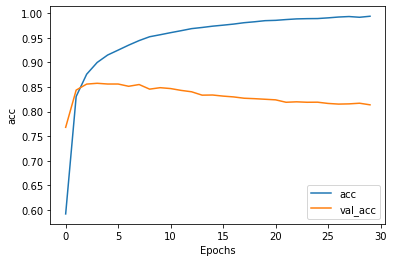

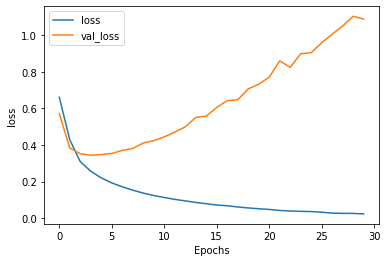

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, string):
    train = history.history[string]
    validation = history.history['val_' + string]
    plt.plot(train)
    plt.plot(validation)
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_history(history, 'acc')
plot_history(history, 'loss')


In [ ]:
reverse_word_index = dict((value, key) for (key, value) in word_index.items())

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[0]))
print(train_sentences[0])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
former versace store clerk sues over secret 'black code' for minority shoppers


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [ ]:
from google.colab import files

In [ ]:
files.download('meta.tsv')
files.download('vecs.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After All of this we want to introduce a new method called subwords
the whole facts about this is classifying this type of data isn't well with normal Embedding layers because it doesn't understand the sentiment of the sentence so it shows a poor classifying on this dataset. the reason is shown in below:

In [ ]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)


2.4.1


In [ ]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78OSQC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78OSQC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78OSQC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 16s 37ms/step - loss: 0.6905 - accuracy: 0.5283 - val_loss: 0.6438 - val_accuracy: 0.7484
Epoch 2/10
391/391 [==============================] - 15s 36ms/step - loss: 0.5858 - accuracy: 0.7625 - val_loss: 0.4533 - val_accuracy: 0.8122
Epoch 3/10
391/391 [==============================] - 15s 36ms/step - loss: 0.3917 - accuracy: 0.8602 - val_loss: 0.3593 - val_accuracy: 0.8648
Epoch 4/10
391/391 [==============================] - 15s 37ms/step - loss: 0.3022 - accuracy: 0.8929 - val_loss: 0.3292 - val_accuracy: 0.8711
Epoch 5/10
391/391 [==============================] - 15s 36ms/step - loss: 0.2617 - accuracy: 0.9069 - val_loss: 0.3320 - val_accuracy: 0.8616
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.2323 - accuracy: 0.9183 - val_loss: 0.3062 - val_accuracy: 0.8806
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.2135 - accuracy: 0.9261 - val_loss: 0.3201 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

As You Can See the classifier accuracy is poor so the solution for solving this problem is using RNN 
